## RNN+LSTM Model to Predict JPM Stock Price
This code was partially adopted from https://www.kaggle.com/bunny01/predict-stock-price-of-apple-inc-with-lstm

In [316]:
from __future__ import print_function
import numpy as np
import pandas as pd
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from sklearn.cross_validation import  train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import math

In [317]:
# parameters to be set ("optimum" hyperparameters obtained from grid search):
look_back = 7
epochs = 400
batch_size = 32

In [318]:
np.random.seed(7)

In [319]:
jpm = pd.read_csv('C:/Users/Heidi/Desktop/MMAI Course/894 Deep Learning/Project/0.0-sh-data-JPM.csv')

In [320]:
# reshape to column vector
price_close=jpm['Adj_Close'].values.astype('float32')
df = price_close.reshape(len(price_close), 1)

In [321]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
df = scaler.fit_transform(df)

In [322]:
# split data into training set and test set
train_size = int(len(df) * 0.8)
test_size = len(df) - train_size
train, test = df[0:train_size,:], df[train_size:len(df),:]

print('Split data into training set and test set... Number of training samples/ test samples:', len(train), len(test))

Split data into training set and test set... Number of training samples/ test samples: 2013 504


In [323]:
# convert an array of values into a time series dataset 
# in form 
#                     X                     Y
# t-look_back+1, t-look_back+2, ..., t     t+1

def create_dataset(dataset, look_back):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

# convert JP Morgan's stock price data into time series dataset
x_train, y_train = create_dataset(train, look_back)
x_test, y_test = create_dataset(test, look_back)

In [324]:
# reshape input of the LSTM to be format [samples, time steps, features]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [325]:
# create and fit the RNN & LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')
history=model.fit(x_train, y_train, nb_epoch=epochs, batch_size=batch_size, validation_data=(x_test, y_test),verbose=2,shuffle=False)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 2005 samples, validate on 496 samples
Epoch 1/400
 - 3s - loss: 0.0106 - val_loss: 0.1154
Epoch 2/400
 - 0s - loss: 0.0064 - val_loss: 0.0967
Epoch 3/400
 - 0s - loss: 0.0043 - val_loss: 0.0776
Epoch 4/400
 - 0s - loss: 0.0029 - val_loss: 0.0619
Epoch 5/400
 - 0s - loss: 0.0018 - val_loss: 0.0496
Epoch 6/400
 - 0s - loss: 0.0011 - val_loss: 0.0409
Epoch 7/400
 - 0s - loss: 5.4539e-04 - val_loss: 0.0352
Epoch 8/400
 - 0s - loss: 2.8720e-04 - val_loss: 0.0319
Epoch 9/400
 - 0s - loss: 1.9040e-04 - val_loss: 0.0299
Epoch 10/400
 - 0s - loss: 1.6880e-04 - val_loss: 0.0285
Epoch 11/400
 - 0s - loss: 1.7129e-04 - val_loss: 0.0273
Epoch 12/400
 - 0s - loss: 1.7817e-04 - val_loss: 0.0262
Epoch 13/400
 - 0s - loss: 1.8421e-04 - val_loss: 0.0251
Epoch 14/400
 - 0s - loss: 1.8856e-04 - val_loss: 0.0241
Epoch 15/400
 - 0s - loss: 1.9136e-04 - val_loss: 0.0231
Epoch 16/400
 - 0s - loss: 1.9288e-04 - val_loss: 0.0221
Epoch 17/400
 - 0s - loss: 1.9335e-04 - val_loss: 0.0212
Epoch 18/400
 - 0

Epoch 144/400
 - 0s - loss: 1.1054e-04 - val_loss: 0.0011
Epoch 145/400
 - 0s - loss: 1.1029e-04 - val_loss: 0.0011
Epoch 146/400
 - 0s - loss: 1.1005e-04 - val_loss: 0.0010
Epoch 147/400
 - 0s - loss: 1.0980e-04 - val_loss: 0.0010
Epoch 148/400
 - 0s - loss: 1.0956e-04 - val_loss: 9.9884e-04
Epoch 149/400
 - 0s - loss: 1.0932e-04 - val_loss: 9.7940e-04
Epoch 150/400
 - 0s - loss: 1.0908e-04 - val_loss: 9.6030e-04
Epoch 151/400
 - 0s - loss: 1.0884e-04 - val_loss: 9.4152e-04
Epoch 152/400
 - 0s - loss: 1.0860e-04 - val_loss: 9.2310e-04
Epoch 153/400
 - 0s - loss: 1.0836e-04 - val_loss: 9.0496e-04
Epoch 154/400
 - 0s - loss: 1.0812e-04 - val_loss: 8.8718e-04
Epoch 155/400
 - 0s - loss: 1.0789e-04 - val_loss: 8.6966e-04
Epoch 156/400
 - 0s - loss: 1.0765e-04 - val_loss: 8.5246e-04
Epoch 157/400
 - 0s - loss: 1.0742e-04 - val_loss: 8.3557e-04
Epoch 158/400
 - 0s - loss: 1.0719e-04 - val_loss: 8.1899e-04
Epoch 159/400
 - 0s - loss: 1.0696e-04 - val_loss: 8.0271e-04
Epoch 160/400
 - 0s - lo

Epoch 277/400
 - 0s - loss: 5.9372e-05 - val_loss: 4.1544e-04
Epoch 278/400
 - 0s - loss: 5.5845e-05 - val_loss: 2.5827e-04
Epoch 279/400
 - 0s - loss: 5.7428e-05 - val_loss: 3.7166e-04
Epoch 280/400
 - 0s - loss: 5.5214e-05 - val_loss: 2.7036e-04
Epoch 281/400
 - 0s - loss: 5.6584e-05 - val_loss: 3.4444e-04
Epoch 282/400
 - 0s - loss: 5.4897e-05 - val_loss: 2.7110e-04
Epoch 283/400
 - 0s - loss: 5.6142e-05 - val_loss: 3.2469e-04
Epoch 284/400
 - 0s - loss: 5.4669e-05 - val_loss: 2.6586e-04
Epoch 285/400
 - 0s - loss: 5.5896e-05 - val_loss: 3.0879e-04
Epoch 286/400
 - 0s - loss: 5.4472e-05 - val_loss: 2.5769e-04
Epoch 287/400
 - 0s - loss: 5.5780e-05 - val_loss: 2.9534e-04
Epoch 288/400
 - 0s - loss: 5.4291e-05 - val_loss: 2.4846e-04
Epoch 289/400
 - 0s - loss: 5.5780e-05 - val_loss: 2.8443e-04
Epoch 290/400
 - 0s - loss: 5.4139e-05 - val_loss: 2.3983e-04
Epoch 291/400
 - 0s - loss: 5.5852e-05 - val_loss: 2.7528e-04
Epoch 292/400
 - 0s - loss: 5.4004e-05 - val_loss: 2.3268e-04
Epoch 29

In [326]:
# make predictions
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

In [327]:
# invert predictions and targets to unscaled
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])

In [328]:
# calculate root mean squared error
train_score = math.sqrt(mean_squared_error(y_train[0], train_predict[:,0]))
print('Train Score: %.2f RMSE' % (train_score))
test_score = math.sqrt(mean_squared_error(y_test[0], test_predict[:,0]))
print('Test Score: %.2f RMSE' % (test_score))

Train Score: 0.76 RMSE
Test Score: 1.51 RMSE


In [339]:
# shift predictions of training data for plotting
trainPredictPlot = np.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

# shift predictions of test data for plotting
testPredictPlot = np.empty_like(df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1, :] = test_predict

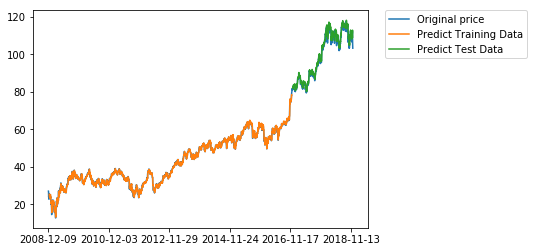

<Figure size 9600x7200 with 0 Axes>

In [340]:
#compare original stock price vs predicted stock price in both training and test data set
from matplotlib.pyplot import figure
plt.plot(scaler.inverse_transform(df),label="Original price")
plt.plot(trainPredictPlot,label='Predict Training Data')
plt.plot(testPredictPlot,label='Predict Test Data')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(range(0,jpm.shape[0],500),jpm['Date'].loc[::500])
figure(num=None, figsize=(12, 9), dpi=800, facecolor='w', edgecolor='k')
plt.show()

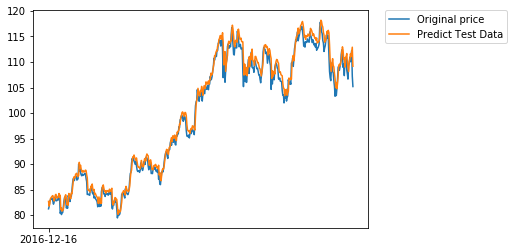

<Figure size 18000x9000 with 0 Axes>

In [331]:
#Plot of original stock prices vs predicted stock price in test dataset
plt.plot(scaler.inverse_transform(df[len(train_predict)+(look_back*2)+1:len(df)-1, :]),label="Original price")
plt.plot(test_predict,label='Predict Test Data')
plt.xticks(range(0,test_predict.shape[1],1000),jpm['Date'].loc[len(train_predict)+(look_back*2)+1::])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
figure(num=None, figsize=(18, 9), dpi=1000, facecolor='w', edgecolor='k')
plt.show()

## **Model Validation**

### 1. Diagnostic Plots for LSTM

- An **underfit model** is one that is demonstrated to perform well on the training dataset and poor on the test dataset. This can be diagnosed from a plot where the training loss is lower than the validation loss, and the validation loss has a trend that suggests further improvements are possible.

- A **good fit** is a case where the performance of the model is good on both the train and validation sets. This can be diagnosed from a plot where the train and validation loss decrease and stabilize around the same point.

- An **overfit model** is one where performance on the train set is good and continues to improve, whereas performance on the validation set improves to a point and then begins to degrade. This can be diagnosed from a plot where the train loss slopes down and the validation loss slopes down, hits an inflection point, and starts to slope up again.

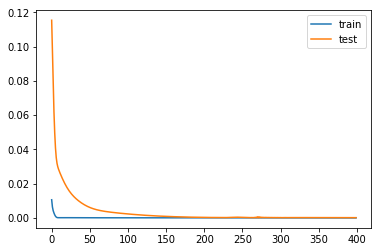

In [332]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

### 2. Autocorrelation Measurement

#### First calculate Xt - Xt-1 = error term, also called **white noise**, which use the np.diff() function

- **Graph 1 - returns**: process appears to follow random walk and centered about zero
<br/><br/>
- **Autocorrelation & Partial Autocorrelation Plot**: indicate no significant serial correlation. But **some serial correlation** in the ACF, and PACF plots around lags 8, 14, 20, 21, 24 and 30. This means that there should be better models to describe the actual price change process. 
<br/><br/>
- **QQ and Probability Plots**：QQ plot visually assesses whether sample data comes from a specified distribution. For this model, the shape of QQ and Probability plots indicates that the process is close to normality but with **'heavy tails'**. 

This code was adapted from the blog http://www.seanabu.com/2016/03/22/time-series-seasonal-ARIMA-model-in-python/

In [333]:
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
from arch import arch_model

In [334]:
def tsplot(y, lags=None, figsize=(10, 8), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        #mpl.rcParams['font.family'] = 'Ubuntu Mono'
        layout = (3, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        qq_ax = plt.subplot2grid(layout, (2, 0))
        pp_ax = plt.subplot2grid(layout, (2, 1))
        
        y.plot(ax=ts_ax)
        ts_ax.set_title('Time Series Analysis Plots')
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.5)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.5)
        sm.qqplot(y, line='s', ax=qq_ax)
        qq_ax.set_title('QQ Plot')        
        scs.probplot(y, sparams=(y.mean(), y.std()), plot=pp_ax)

        plt.tight_layout()
    return 

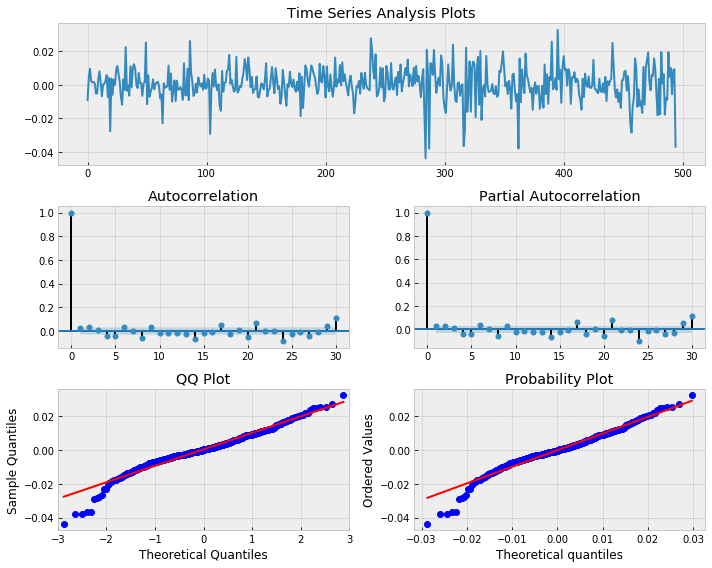

In [335]:
y_a=testPredict.reshape(-1)
tsplot(np.diff(y_a),30)